In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Supress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the csv file

data = pd.read_csv("Movies Dataset.csv")

data.head(3)

,Unnamed: 0,Movie name,Release date,Language,Rating,Runtime,Description,Budget,Revenue,Movie link,Genre
0,0,Prey,"Aug 02, 2022",English,81.0,1h 40m,"When danger threatens her camp, the fierce and...",-,-,https://www.themoviedb.org/movie/766507,"['Action', 'Science Fiction', 'Thriller']"
1,1,Thor: Love and Thunder,"Jul 06, 2022",English,68.0,1h 59m,After his retirement is interrupted by Gorr th...,"$250,000,000.00","$720,000,000.00",https://www.themoviedb.org/movie/616037,"['Action', 'Adventure', 'Fantasy']"
2,2,Dragon Ball Super: Super Hero,"Jun 11, 2022",Japanese,75.0,1h 39m,"The Red Ribbon Army, an evil organization that...",-,"$17,030,000.00",https://www.themoviedb.org/movie/610150,"['Animation', 'Science Fiction', 'Action']"


In [3]:
# Checking shape of the dataset

data.shape

(10000, 11)

In [4]:
# getting info about the columns of the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    10000 non-null  int64  
 1   Movie name    10000 non-null  object 
 2   Release date  10000 non-null  object 
 3   Language      10000 non-null  object 
 4   Rating        10000 non-null  float64
 5   Runtime       9816 non-null   object 
 6   Description   10000 non-null  object 
 7   Budget        10000 non-null  object 
 8   Revenue       10000 non-null  object 
 9   Movie link    10000 non-null  object 
 10  Genre         10000 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 859.5+ KB


In [5]:
# Checking the number of unique values in each column

data.nunique()

Unnamed: 0      10000
Movie name       9676
Release date     5818
Language           55
Rating             77
Runtime           218
Description      9888
Budget            649
Revenue          5145
Movie link      10000
Genre            2287
dtype: int64

In [6]:
# removing Duplicates

data = data.drop_duplicates()

In [7]:
# droping 'Unnamed: 0' column

data = data.drop(columns = ['Unnamed: 0'])

In [8]:
# Dealing with Budget Column

for i in range(0,len(data.index)):
    
    data["Budget"][i] = data["Budget"][i].strip("$")
    
for i in range(0,len(data.index)):
    
    data["Budget"][i]  = data["Budget"][i].replace(",", "")
    
    data["Budget"][i]  = data["Budget"][i].replace("-", "0")
    
# changing data type to float

for i in range(0,len(data.index)):
    
    data["Budget"][i]  = float(data["Budget"][i])
    
data["Budget"] = data["Budget"].astype(float)

# replacing 0 with Null

data['Budget'] = data['Budget'].replace(0,np.NAN)

In [9]:
# Dealing with Revenue Column

for i in range(0,len(data.index)):
    
    data["Revenue"][i] = data["Revenue"][i].strip("$")
    
for i in range(0,len(data.index)):
    
    data["Revenue"][i]  = data["Revenue"][i].replace(",", "")
    
    data["Revenue"][i]  = data["Revenue"][i].replace("-", "0")

# changing data type to float

for i in range(0,len(data.index)):
    
    data["Revenue"][i]  = float(data["Revenue"][i])
    
data["Revenue"] = data["Revenue"].astype(float)

# Replacing 0 with null

for i in range(0,len(data.index)):
    
    if(data["Revenue"][i] == 0):
        
        data["Revenue"][i] = np.NaN

In [10]:
# creating a new column which represents no. of hours in runtime

data['hr'] = ""
for i in range(0, len(data.index)):
    try:
        data['hr'][i] = data['Runtime'][i].split("h")[0]
    except:
        data['hr'][i] = '0'

In [11]:
# creating a new column which represents no. of min in runtime

data['min'] = ""

for i in range(0, len(data.index)):    
    try:
        data['min'][i] = data['Runtime'][i].split("h")[1].strip('m')
    except:
        data['min'][i] = '0'

In [12]:
for i in range(0, len(data.index)):
    
    if(data['min'][i] == ""):
        
        data['min'][i] = "0"
        
# creating column runtime in min

data ['Runtime in min'] = ""

for i in range(0,len(data.index)):
    try:
        data ['Runtime in min'][i] = ((int(data['hr'][i])*60) + (int(data['min'][i])))
    except:
        data ['Runtime in min'][i] = data['hr'][i].strip('m')
        
# changing data type of 'Runtime in min' column to int
        
data['Runtime in min'] = data['Runtime in min'].astype(int)

In [13]:
# deleting hr and min column

data = data.drop(columns = ['hr', 'min'])

In [14]:
# Replacing 0 with null

data['Runtime in min'] = data['Runtime in min'].apply(lambda x:np.NaN if x==0 else x)

In [15]:
# dealing with genre column

for i in range(0, len(data.index)):
    
    data['Genre'][i] = "".join(data['Genre'][i]).strip("[]").replace("'", "").replace(",", "|")

In [16]:
# changing datatype of Release data column to datetime

data['Release date'] = pd.to_datetime(data['Release date'])

# creating release year column

data['release_year'] = ""

for i in range(0, len(data.index)):
    
    data['release_year'][i] = data['Release date'][i].year

# Applying filter to data ie release year b/w 1960 and 2022

data = data[data['release_year'] >= 1960]

data = data[data['release_year'] < 2022]

In [17]:
# checking missing values

missing = pd.DataFrame((data.isnull().sum()/len(data.index))*100)

missing.columns = ['Percentage of Missing Values']

missing

,Percentage of Missing Values
Movie name,0.000000
Release date,0.000000
Language,0.000000
Rating,0.000000
Runtime,0.991393
Description,0.000000
Budget,45.691252
Revenue,43.806515
Movie link,0.000000
Genre,0.000000


In [18]:
data = data.drop(columns = ['Runtime'])

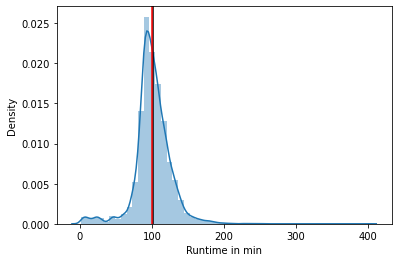

In [19]:
# dealing with missing values of Runtime in min column

sns.distplot(data['Runtime in min'])

plt.axvline(data['Runtime in min'].mean(), color = 'black')

plt.axvline(data['Runtime in min'].median(), color = 'red')

**Data looks normally distributed so we can replace null values with mean**

In [20]:
data['Runtime in min'] = data['Runtime in min'].replace(np.NaN, data['Runtime in min'].mean())

In [21]:
data.reset_index(inplace = True, drop = True)

In [22]:
data.head(5)

,Movie name,Release date,Language,Rating,Description,Budget,Revenue,Movie link,Genre,Runtime in min,release_year
0,Jujutsu Kaisen 0,2021-12-24,Japanese,78.0,Yuta Okkotsu is a nervous high school student ...,NaN,1.615775e+08,https://www.themoviedb.org/movie/810693,Animation| Action| Fantasy,105.0,2021
1,Spider-Man: No Way Home,2021-12-15,English,80.0,Peter Parker is unmasked and no longer able to...,200000000.0,1.901000e+09,https://www.themoviedb.org/movie/634649,Action| Adventure| Science Fiction,148.0,2021
2,Demon Slayer -Kimetsu no Yaiba- The Movie: Mug...,2020-10-16,Japanese,84.0,"Tanjirō Kamado, joined with Inosuke Hashibira,...",15800000.0,5.030637e+08,https://www.themoviedb.org/movie/635302,Animation| Action| Adventure| Fantasy,117.0,2020
3,Encanto,2021-11-24,English,77.0,"The tale of an extraordinary family, the Madri...",50000000.0,2.530000e+08,https://www.themoviedb.org/movie/568124,Animation| Comedy| Family| Fantasy,102.0,2021
4,Legend Quest: The Origin,2021-02-15,Spanish;,86.0,"When a human baby crosses the Eternal Mirror, ...",NaN,NaN,https://www.themoviedb.org/movie/667276,Animation| Horror| Comedy,90.0,2021


# Analysis of data between 1960 and 2022

**Research Question 1 : Which year has the highest release of movies?**

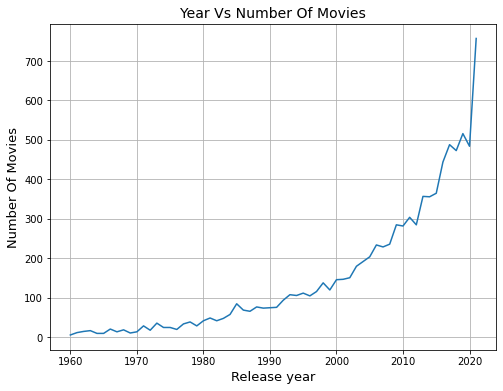

In [23]:
plt.figure(figsize = (8,6))
data.groupby('release_year').count()['Movie name']
data.groupby('release_year').count()['Movie name'].plot()
plt.title("Year Vs Number Of Movies",fontsize = 14)
plt.xlabel('Release year',fontsize = 13)
plt.ylabel('Number Of Movies',fontsize = 13)
plt.grid()

**After Seeing the plot and the output we can conclude that year 2021 year has the highest release of movies (729) followed by year 2022 (578) and year 2019 (510)**

**Research Question 2 : Which Movie Has The Highest Or Lowest Profit?**

In [24]:
# creating Profit column
data['Profit'] = data['Revenue'] - data['Budget'] 
top_10_profit = data.sort_values(by = 'Profit', ascending = False).head(10)
bottom_10_profit = data.sort_values(by = 'Profit', ascending = True).head(10)

Text(0, 0.5, 'Name Of Movies')

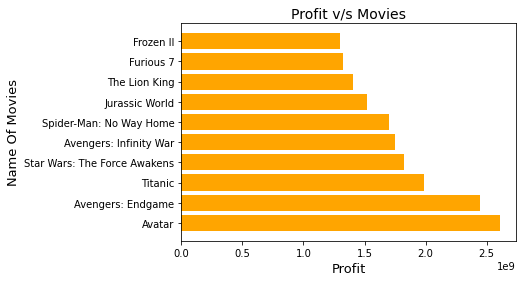

In [25]:
plt.barh(top_10_profit['Movie name'], top_10_profit['Profit'], color = 'orange')
plt.title("Profit v/s Movies",fontsize = 14)
plt.xlabel('Profit',fontsize = 13)
plt.ylabel('Name Of Movies',fontsize = 13)

Text(0, 0.5, 'Name Of Movies')

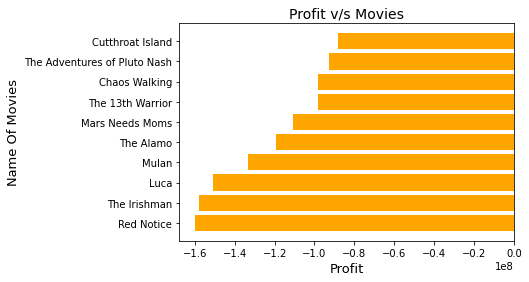

In [26]:
plt.barh(bottom_10_profit['Movie name'], bottom_10_profit['Profit'], color = 'orange')
plt.title("Profit v/s Movies",fontsize = 14)
plt.xlabel('Profit',fontsize = 13)
plt.ylabel('Name Of Movies',fontsize = 13)

**As we can see that 'Avatar' movie earn the highest profit in all, making over 2.5B in profit in this dataset.And the most in loss movie in this dataset is Red notice. Going in loss by more than 160M**

**Research Question 3 : Movie with Highest And Lowest Budget?**

In [27]:
top_10_budget = data.sort_values(by = 'Budget', ascending = False).head(10)
bottom_10_budget = data.sort_values(by = 'Budget', ascending = True).head(10)

Text(0, 0.5, 'Name Of Movies')

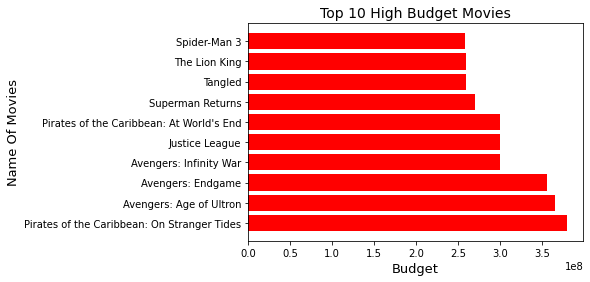

In [28]:
plt.barh(top_10_budget['Movie name'], top_10_budget['Budget'], color = 'red')
plt.title("Top 10 High Budget Movies",fontsize = 14)
plt.xlabel('Budget',fontsize = 13)
plt.ylabel('Name Of Movies',fontsize = 13)

Text(0, 0.5, 'Name Of Movies')

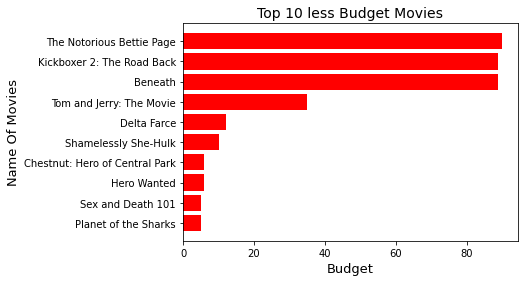

In [29]:
plt.barh(bottom_10_budget['Movie name'], bottom_10_budget['Budget'], color = 'red')
plt.title("Top 10 less Budget Movies",fontsize = 14)
plt.xlabel('Budget',fontsize = 13)
plt.ylabel('Name Of Movies',fontsize = 13)

**Movie Which Has Highest budget :  Pirates of the Caribbean: On Stranger Tides**

**Movie Which Has Lowest budget  :  Sex and Death 101**

**Research Question 4 : Movie with Largest And Lowest Earned Revenue?**

In [30]:
top_10_revenue = data.sort_values(by = 'Revenue', ascending = False).head(10)
bottom_10_revenue = data.sort_values(by = 'Revenue', ascending = True).head(10)

Text(0, 0.5, 'Name Of Movies')

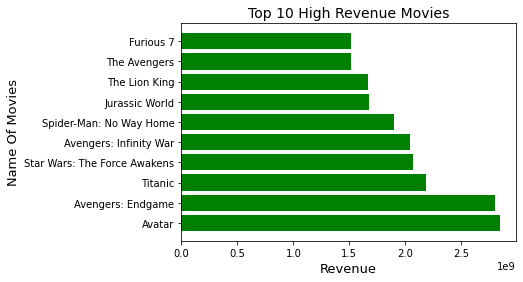

In [31]:
plt.barh(top_10_revenue['Movie name'], top_10_revenue['Revenue'], color = 'green')
plt.title("Top 10 High Revenue Movies",fontsize = 14)
plt.xlabel('Revenue',fontsize = 13)
plt.ylabel('Name Of Movies',fontsize = 13)

Text(0, 0.5, 'Name Of Movies')

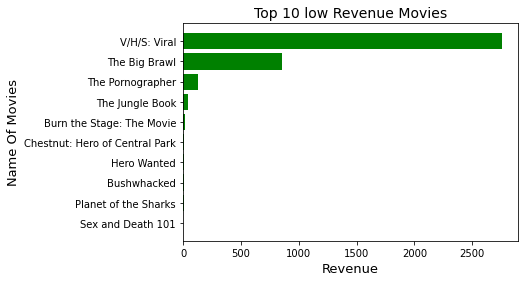

In [32]:
plt.barh(bottom_10_revenue['Movie name'], bottom_10_revenue['Revenue'], color = 'green')
plt.title("Top 10 low Revenue Movies",fontsize = 14)
plt.xlabel('Revenue',fontsize = 13)
plt.ylabel('Name Of Movies',fontsize = 13)

**As we can see that 'Avatar' movie made the highest revenue in all, making over 2.84B revenue in this dataset. And the movie which made lowest revenue is 'Sex and Death 101'.**

**Research Question 5 : Movie with Longest And Shortest Rintime?**

In [33]:
top_10_runtime = data.sort_values(by = 'Runtime in min', ascending = False).head(10)
bottom_10_runtime = data.sort_values(by = 'Runtime in min', ascending = True).head(10)

Text(0, 0.5, 'Name Of Movies')

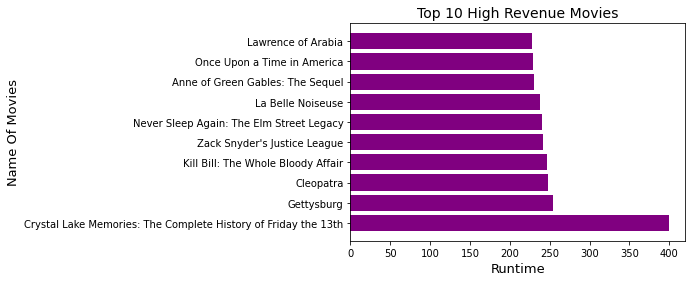

In [34]:
plt.barh(top_10_runtime['Movie name'], top_10_runtime['Runtime in min'], color = 'purple')
plt.title("Top 10 High Revenue Movies",fontsize = 14)
plt.xlabel('Runtime',fontsize = 13)
plt.ylabel('Name Of Movies',fontsize = 13)

Text(0, 0.5, 'Name Of Movies')

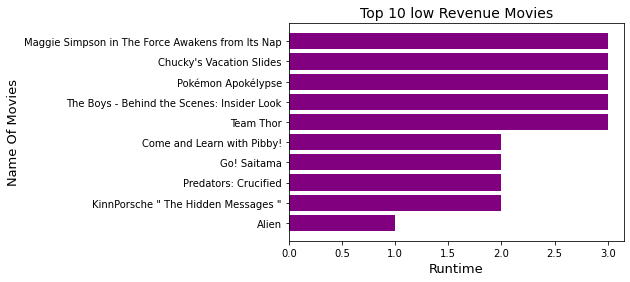

In [35]:
plt.barh(bottom_10_runtime['Movie name'], bottom_10_runtime['Runtime in min'], color = 'purple')
plt.title("Top 10 low Revenue Movies",fontsize = 14)
plt.xlabel('Runtime',fontsize = 13)
plt.ylabel('Name Of Movies',fontsize = 13)

**I have never heard a runtime of a movie so long, Runtime of 400 min, that's approx 7 hrs! So 'Crystal Lake Memories: The Complete History of Friday the 13th' movie has the highest runtime. This movie contain 4 or 5 parts that's why it is so long.**

**The name of the movie with shortest runtime is Alien, runtime of just 1 min! Woah! I have never seen such a short movie in my lifetime.**

**Research Question 6 : Movie with Highest And Lowest Votes?**

In [36]:
top_10_userscore = data.sort_values(by = 'Rating', ascending = False).head(10)
bottom_10_userscore = data.sort_values(by = 'Rating', ascending = True).head(10)

Text(0, 0.5, 'Name Of Movies')

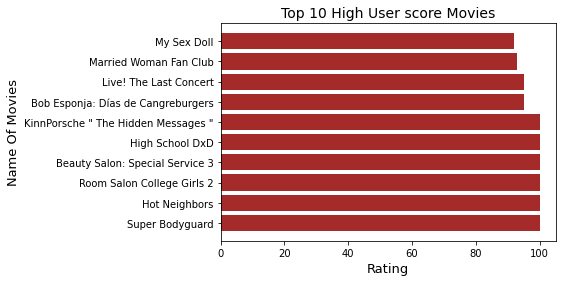

In [37]:
plt.barh(top_10_userscore['Movie name'], top_10_userscore['Rating'], color = 'brown')
plt.title("Top 10 High User score Movies",fontsize = 14)
plt.xlabel('Rating',fontsize = 13)
plt.ylabel('Name Of Movies',fontsize = 13)

In [38]:
pd.DataFrame(bottom_10_userscore['Movie name'])

,Movie name
6999,XXX Kiss Kiss Kiss
74,Friend Couples: Swapping
8139,Adultery Alumni Association 2
2397,Dream to be a Wife
1679,Female Urologists
224,女子高生物語 淫らな果実
227,Nice Sister-In-Law 3
6777,Jokyoshi Nikki 3 Himerareta Sei
8435,聊斋艳谭之婴宁
6433,Mōretsu! Tōmei hentai ningen suke suke mirakur...


**Movies with 100% user score - Super Bodyguard, Beauty Salon: Special Service 3, Hot Neighbors, Room Salon College Girls 2,  KinnPorsche " The Hidden Messages "**

**Research Question 7 : Which Year Has The Highest Profit Rate?**

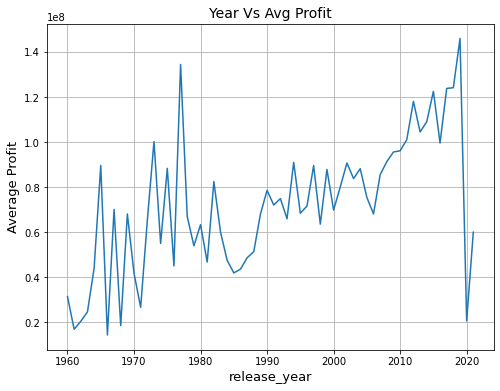

In [39]:
plt.figure(figsize = (8,6))
plt.title("Year Vs Avg Profit",fontsize = 14)
plt.xlabel('Release year',fontsize = 13)
plt.ylabel('Average Profit',fontsize = 13)
data.groupby('release_year').mean()['Profit'].plot()
plt.grid()

**According to the plot year 2119 and 1977 is the most profitable years And the profit was very low between the years 1960 and 1970.**

**Research Question 8 : Which length movies most liked by the audiences according to their popularity?**

<AxesSubplot:title={'center':'Rating Vs Avg Userscore'}, xlabel='Runtime in min', ylabel='Userscore'>

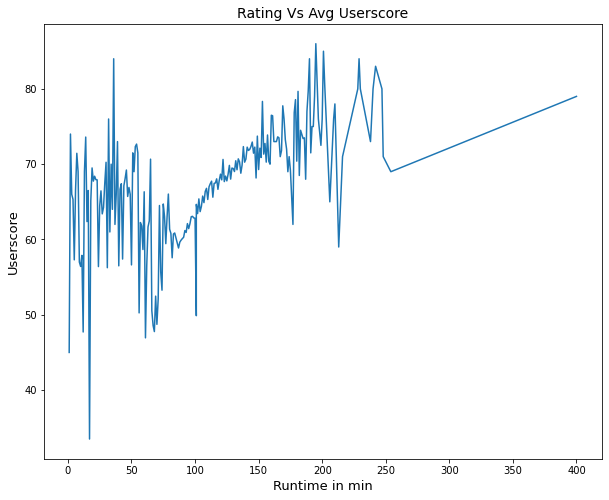

In [40]:
plt.figure(figsize = (10,8))
plt.title("Rating Vs Avg Userscore",fontsize = 14)
plt.xlabel('Runtime',fontsize = 13)
plt.ylabel('Userscore',fontsize = 13)
plt.grid()
data.groupby('Runtime in min').mean()['Rating'].plot()

**According to the plot we can say that movies in the range of 130-200 runtime are more popular than other runtime movies. Because it is boring to see the long duration movies.**

**Research Question 9: Average Runtime Of Movies From Year To Year?**

<AxesSubplot:title={'center':'Year Vs Avg Runtime'}, xlabel='release_year', ylabel='Average Runtime'>

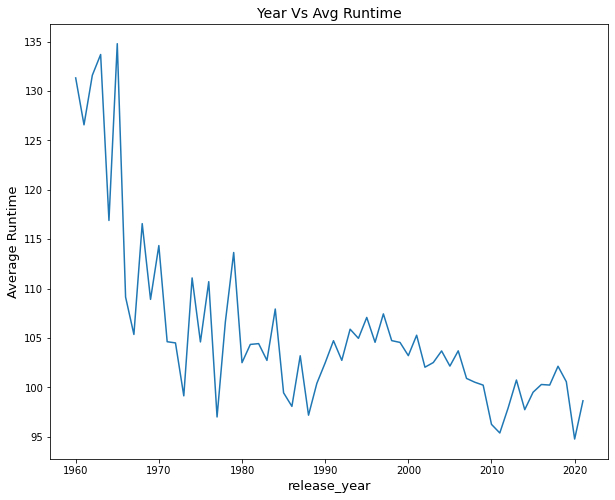

In [41]:
plt.figure(figsize = (10,8))
plt.title("Year Vs Avg Runtime",fontsize = 14)
plt.xlabel('Release year',fontsize = 13)
plt.ylabel('Average Runtime',fontsize = 13)
plt.grid()
data.groupby('release_year').mean()['Runtime in min'].plot()

**According to the plot movie duration is decreasing year to year and it's TRUE. Because at this time nobody want to watch the long duration movies because it is quite boring. That's why the average runtime duraion of the movies are arround 100 Minutes.**

**Research Question 10: How Does Popularity Revenue On Profit?**

Correlation b/w Revenue and Budget : 0.23803989312227408


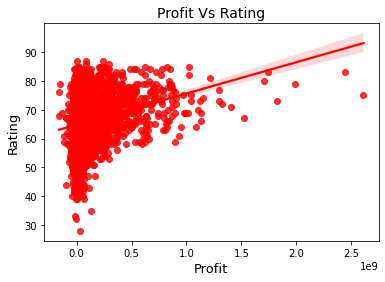

In [42]:
data1 = data.dropna(subset = ['Revenue', 'Budget'])
data_corr = data1.corr()
plt.title("Profit Vs Rating",fontsize = 14)
plt.xlabel('Revenue',fontsize = 13)
plt.ylabel('Budget',fontsize = 13)
sns.regplot(data['Profit'] , data['Rating'], color ='red')
print("Correlation b/w Revenue and Budget :", data_corr.loc['Rating']['Profit'])

**Research Question 11: Movies released in Each month**

In [43]:
data['Release month'] = ""

for i in range(0, len(data.index)):
    
    if(data['Release date'][i].month ==  1):
        data['Release month'][i] = "Jan"
        
    if(data['Release date'][i].month ==  2):
        data['Release month'][i] = "Feb"
        
    if(data['Release date'][i].month ==  3):
        data['Release month'][i] = "Mar"
        
    if(data['Release date'][i].month ==  4):
        data['Release month'][i] = "Apr"
        
    if(data['Release date'][i].month == 5):
        data['Release month'][i] = "May"
        
    if(data['Release date'][i].month == 6):
        data['Release month'][i] = "Jun"
        
    if(data['Release date'][i].month == 7):
        data['Release month'][i] = "Jul"
        
    if(data['Release date'][i].month == 8):
        data['Release month'][i] = "Aug"
        
    if(data['Release date'][i].month == 9):
        data['Release month'][i] = "Sep"
        
    if(data['Release date'][i].month == 10):
        data['Release month'][i] = "Oct"
        
    if(data['Release date'][i].month == 11):
        data['Release month'][i] = "Nov"
        
    if(data['Release date'][i].month == 12):
        data['Release month'][i] = "Dec"

<AxesSubplot:title={'center':'Number of movies released in each month'}, xlabel='Release month', ylabel='Number Of Movies'>

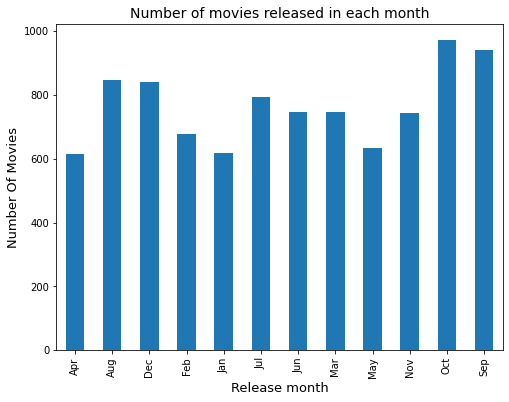

In [44]:
plt.figure(figsize = (8,6))
plt.title("Number of movies released in each month",fontsize = 14)
plt.xlabel('Release month',fontsize = 13)
plt.ylabel('Number Of Movies',fontsize = 13)
data.groupby('Release month').count()['Movie name'].plot(kind = 'bar')

**According to the plot we can conclude that there are higher number of release in september and october month.**

**Research Question 12: Which Genre Has The Highest Release Of Movies?**

<BarContainer object of 20 artists>

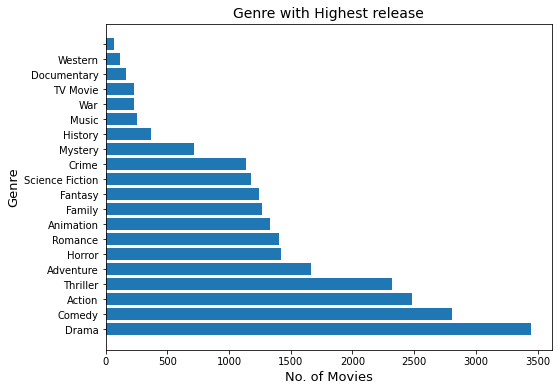

In [45]:
d1 = data['Genre'].str.cat(sep = '|')
d2 = pd.Series(d1.split('|'))
for i in range(0, len(d2)):
    d2[i] = d2[i].strip(" ")
    
d3 = pd.DataFrame(d2.value_counts(), columns = ['count'])
plt.figure(figsize = (8,6))
plt.title("Genre with Highest release",fontsize = 14)
plt.xlabel('No. of Movies',fontsize = 13)
plt.ylabel('Genre',fontsize = 13)
plt.barh(d3.index, d3['count'])

**According to the plot Drama genre has the highest release of movies followed by Comedy and Action.**

**Research Question 13: Popularity of genre based on year**

<AxesSubplot:xlabel='release_year'>

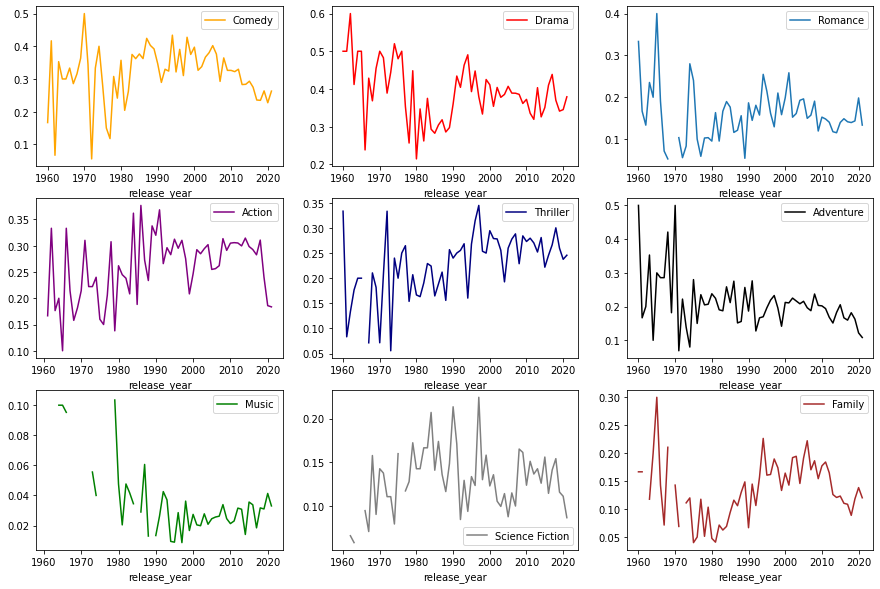

In [46]:
plt.figure(figsize = (15,10))
plt.subplot(3, 3, 1)
(data[data['Genre'].str.contains('Comedy')].groupby('release_year').count()['Movie name']/data.groupby('release_year').count()['Movie name']).plot(label = 'Comedy',legend = True, color = 'orange')
plt.subplot(3, 3, 2)
(data[data['Genre'].str.contains('Drama')].groupby('release_year').count()['Movie name']/data.groupby('release_year').count()['Movie name']).plot(label = 'Drama',legend = True, color = 'red')
plt.subplot(3, 3, 3)
(data[data['Genre'].str.contains('Romance')].groupby('release_year').count()['Movie name']/data.groupby('release_year').count()['Movie name']).plot(label = 'Romance',legend = True)
plt.subplot(3, 3, 4)
(data[data['Genre'].str.contains('Action')].groupby('release_year').count()['Movie name']/data.groupby('release_year').count()['Movie name']).plot(label = 'Action',legend = True, color = 'purple')
plt.subplot(3, 3, 5)
(data[data['Genre'].str.contains('Thriller')].groupby('release_year').count()['Movie name']/data.groupby('release_year').count()['Movie name']).plot(label = 'Thriller',legend = True, color = 'navy')
plt.subplot(3, 3, 6)
(data[data['Genre'].str.contains('Adventure')].groupby('release_year').count()['Movie name']/data.groupby('release_year').count()['Movie name']).plot(label = 'Adventure',legend = True, color = 'black')
plt.subplot(3, 3, 7)
(data[data['Genre'].str.contains('Music')].groupby('release_year').count()['Movie name']/data.groupby('release_year').count()['Movie name']).plot(label = 'Music',legend = True, color = 'green')
plt.subplot(3, 3, 8)
(data[data['Genre'].str.contains('Science Fiction')].groupby('release_year').count()['Movie name']/data.groupby('release_year').count()['Movie name']).plot(label = 'Science Fiction',legend = True, color = 'grey')
plt.subplot(3, 3, 9)
(data[data['Genre'].str.contains('Family')].groupby('release_year').count()['Movie name']/data.groupby('release_year').count()['Movie name']).plot(label = 'Family',legend = True, color = 'brown')

**Research Question 13: What Kind Of Properties Are Associated With Movies With High Revenue?**

<AxesSubplot:>

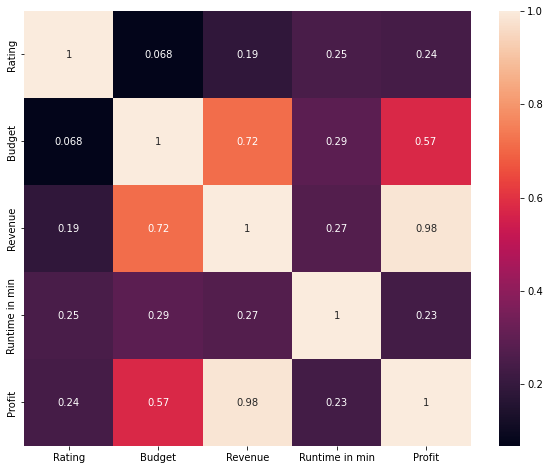

In [47]:
plt.figure(figsize = (10,8))
corr = data.corr()
sns.heatmap(corr, annot = True)

**A brief description of the above plots,**

**1: Budget vs Revenue**

The revenues do increase slightly at higher levels but the number of movies with high budgets seem scarce. There is a good possibility that movies with higher investments result in better revenues.

Correlation = 0.72

**2: Rating/User Score vs Revenue**

The correlation between revenue and User score/ Rating is 0.19. So vote average is not highly related to the revenue.

**3: Runtime vs Revenue**

The correlation between revenue and runtime is 0.27. So runtime is not highly related to the revenue.

**4: Profit vs Revenue**

With increase in Revenue profit increases

Correlation = 0.98

# Conclusion

**Popularity of Thriller movies is increasing while the popularity of Adventure, Romance, Music and Science fiction is decresing**

**Drame, Comedy, Thriller and Action are four most-made genres.**

**Maximum Number Of Movies Release In year 2021.**

**'Avatar', 'Avengers - End game' and 'Titanic' are the most profitable movies.**

**Short or medium duration movies are more popular than long duration movies.**

**Average runtime of the movies are decreasing year by year.**

**Aug, Sept and Oct are most popular month for releasing movies**

**Revenue is directly connected to the budget.**

**Movies with higher budgets have shown a corresponding increase in the revenues.**